In [1]:
!pip install pymorphy2
import pandas as pd
import pymorphy2
import ssl

ssl._create_default_https_context = ssl._create_unverified_context

url = "https://raw.githubusercontent.com/dm-fedorov/pandas_basic/master/data/data_stat/yandex-stat-q.csv"

morph = pymorphy2.MorphAnalyzer()

df = pd.read_csv(url)
df.head()

  Using cached https://files.pythonhosted.org/packages/a3/33/fff9675c68b5f6c63ec8c6e6ff57827dda28a1fa5b2c2d727dffff92dd47/pymorphy2-0.8-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/02/51/2465fd4f72328ab50877b54777764d928da8cb15b74e2680fc1bd8cb3173/pymorphy2_dicts-2.4.393442.3710985-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/a2/55/8f8cab2afd404cf578136ef2cc5dfb50baa1761b68c9da1fb1e4eed343c9/docopt-0.6.2.tar.gz
  Using cached https://files.pythonhosted.org/packages/6a/84/ff1ce2071d4c650ec85745766c0047ccc3b5036f1d03559fd46bb38b5eeb/DAWG_Python-0.7.2-py2.py3-none-any.whl
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13709 sha256=a338d3a1289ff6a05c9eeda3f4ce0a95c96dc73eb3b10c03abca2d822319755a
  Stored in directory: C:\Users\user\AppData\Local\pip\Cache\wheels\9b\04\dd\7daf4150b6d9b12949298737de9431a324d4b797ffd63f526e
Successfully built docopt


,Поисковая фраза,Поисковая система,Визиты,Посетители,Отказы,Глубина просмотра,Время на сайте
0,Итого и средние,NaN,72394,57803,0.120328,1.298934,00:01:18
1,pycode.ru,Яндекс,2068,1225,0.093810,1.674565,00:01:38
2,холопов алексей васильевич,Яндекс,1240,467,0.082258,1.941129,00:03:53
3,золотое правило дидактики,Яндекс,778,751,0.082262,1.087404,00:00:41
4,золотое правило дидактики я.а коменского,Яндекс,743,724,0.068641,1.044415,00:00:31


In [2]:
lst = [j for i, j in enumerate(df["Поисковая фраза"].str.lower())]
lst

['итого и средние',
 'pycode.ru',
 'холопов алексей васильевич',
 'золотое правило дидактики',
 'золотое правило дидактики я.а коменского',
 'как писать тезисы к исследовательской работе',
 'pycode',
 'тезисы доклада на конференцию пример',
 'опираться на “золотое правило” дидактики, описанное я. а. коменским, продуктивно...',
 'холопов алексей васильевич официальный сайт',
 'pycode ru',
 'холопов',
 'основы программирования на python учебник вводный курс',
 'руcode',
 'тезисы на конференцию примеры',
 'rucode',
 'холопов алексей васильевич лекции смотреть',
 'pycode.ru холопов',
 'примеры тезисов на конференцию',
 'как написать тезисы к исследовательской работе образец',
 'дополнительная литература',
 'холопов алексей васильевич лекции смотреть официальный сайт',
 'тезисы к конференции пример',
 'тезисы для конференции образец',
 'золотое правило дидактики коменского',
 'что такое тезисы в исследовательской работе',
 'как написать тезисы к исследовательской работе',
 'холопов лекции',

In [3]:
lstsplit = list(map(lambda x: x.split(), lst))

In [4]:
flatten = [morph.parse(item)[0].normal_form for sub in lstsplit for item in sub]
flatten

['итого',
 'и',
 'средний',
 'pycode.ru',
 'холоп',
 'алексей',
 'василий',
 'золотой',
 'правило',
 'дидактика',
 'золотой',
 'правило',
 'дидактика',
 'я.а',
 'коменский',
 'как',
 'писать',
 'тезис',
 'к',
 'исследовательский',
 'работа',
 'pycode',
 'тезис',
 'доклад',
 'на',
 'конференция',
 'пример',
 'опираться',
 'на',
 '“золотой',
 'правило”',
 'дидактики,',
 'описать',
 'я.',
 'а.',
 'коменским,',
 'продуктивно...',
 'холоп',
 'алексей',
 'василий',
 'официальный',
 'сайт',
 'pycode',
 'ru',
 'холоп',
 'основа',
 'программирование',
 'на',
 'python',
 'учебник',
 'вводный',
 'курс',
 'руcode',
 'тезис',
 'на',
 'конференция',
 'пример',
 'rucode',
 'холоп',
 'алексей',
 'василий',
 'лекция',
 'смотреть',
 'pycode.ru',
 'холоп',
 'пример',
 'тезис',
 'на',
 'конференция',
 'как',
 'написать',
 'тезис',
 'к',
 'исследовательский',
 'работа',
 'образец',
 'дополнительный',
 'литература',
 'холоп',
 'алексей',
 'василий',
 'лекция',
 'смотреть',
 'официальный',
 'сайт',
 'тезис',

In [5]:
dff = pd.Series(flatten)

In [6]:
dff

0               итого
1                   и
2             средний
3           pycode.ru
4               холоп
             ...     
202416              и
202417    современный
202418      философия
202419           а.ю.
202420      моздаковы
Length: 202421, dtype: object

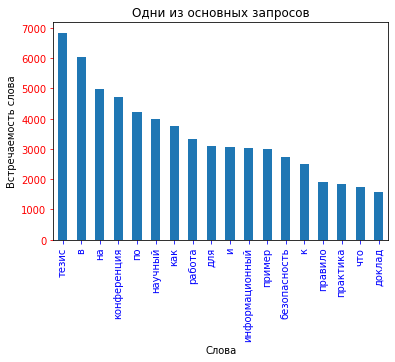

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.title('Одни из основных запросов')

dff.value_counts()[dff.value_counts()>1500].plot.bar()

plt.ylabel('Встречаемость слова')
plt.xlabel('Слова')
ax = plt.gca()
ax.tick_params(axis='x', colors='blue')
ax.tick_params(axis='y', colors='red')
plt.show()